In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax
from matplotlib.animation import FuncAnimation


In [ ]:
url = 'https://media.geeksforgeeks.org/wp-content/uploads/20240320114716/data_for_lr.csv'
data = pd.read_csv(url)
data

# Drop the missing values
data = data.dropna()

# training dataset and labels
train_input = np.array(data.x[0:500]).reshape(500, 1)
train_output = np.array(data.y[0:500]).reshape(500, 1)

# valid dataset and labels
test_input = np.array(data.x[500:700]).reshape(199, 1)
test_output = np.array(data.y[500:700]).reshape(199, 1)


In [ ]:
class LinearRegression:
    def __init__(self):
        self.parameters = {}

    def forward_propagation(self, train_input):
        m = self.parameters['m']
        c = self.parameters['c']
        predictions = np.multiply(m, train_input) + c
        return predictions

    def cost_function(self, predictions, train_output):
        cost = np.mean((train_output - predictions) ** 2)
        return cost

    def backward_propagation(self, train_input, train_output, predictions):
        derivatives = {}
        df = (predictions-train_output)
        # dm= 2/n * mean of (predictions-actual) * input
        dm = 2 * np.mean(np.multiply(train_input, df))
        # dc = 2/n * mean of (predictions-actual)
        dc = 2 * np.mean(df)
        derivatives['dm'] = dm
        derivatives['dc'] = dc
        return derivatives

    def update_parameters(self, derivatives, learning_rate):
        self.parameters['m'] = self.parameters['m'] - learning_rate * derivatives['dm']
        self.parameters['c'] = self.parameters['c'] - learning_rate * derivatives['dc']

    def train(self, train_input, train_output, learning_rate, iters):
        # Initialize random parameters
        self.parameters['m'] = np.random.uniform(0, 1) * -1
        self.parameters['c'] = np.random.uniform(0, 1) * -1

        # Initialize loss
        self.loss = []

        # Initialize figure and axis for animation
        fig, ax = plt.subplots()
        x_vals = np.linspace(min(train_input), max(train_input), 100)
        line, = ax.plot(x_vals, self.parameters['m'] * x_vals +
                        self.parameters['c'], color='red', label='Regression Line')
        ax.scatter(train_input, train_output, marker='o',
                color='green', label='Training Data')

        # Set y-axis limits to exclude negative values
        ax.set_ylim(0, max(train_output) + 1)

        def update(frame):
            # Forward propagation
            predictions = self.forward_propagation(train_input)

            # Cost function
            cost = self.cost_function(predictions, train_output)

            # Back propagation
            derivatives = self.backward_propagation(
                train_input, train_output, predictions)

            # Update parameters
            self.update_parameters(derivatives, learning_rate)

            # Update the regression line
            line.set_ydata(self.parameters['m']
                        * x_vals + self.parameters['c'])

            # Append loss and print
            self.loss.append(cost)
            print("Iteration = {}, Loss = {}".format(frame + 1, cost))

            return line,
        # Create animation
        ani = FuncAnimation(fig, update, frames=iters, interval=200, blit=True)

        # Save the animation as a video file (e.g., MP4)
        ani.save('linear_regression_A.gif', writer='ffmpeg')

        plt.xlabel('Input')
        plt.ylabel('Output')
        plt.title('Linear Regression')
        plt.legend()
        plt.show()

        return self.parameters, self.loss


Iteration = 1, Loss = 10154.238344151538
Iteration = 1, Loss = 1230.5765447381748
Iteration = 1, Loss = 155.17818448500083
Iteration = 1, Loss = 25.580978665748095
Iteration = 2, Loss = 9.963104792111691
Iteration = 3, Loss = 8.080980816731753
Iteration = 4, Loss = 7.854164185665692
Iteration = 5, Loss = 7.826830103764437
Iteration = 6, Loss = 7.823535839960234
Iteration = 7, Loss = 7.823138635875095
Iteration = 8, Loss = 7.82309055903493
Iteration = 9, Loss = 7.823084555848321
Iteration = 10, Loss = 7.82308362301593
Iteration = 11, Loss = 7.8230833012375
Iteration = 12, Loss = 7.823083053118814
Iteration = 13, Loss = 7.823082813898019
Iteration = 14, Loss = 7.823082575770602
Iteration = 15, Loss = 7.823082337796037
Iteration = 16, Loss = 7.823082099860975
Iteration = 17, Loss = 7.823081861951757
Iteration = 18, Loss = 7.823081624066732
Iteration = 19, Loss = 7.823081386205701
Iteration = 20, Loss = 7.823081148368633


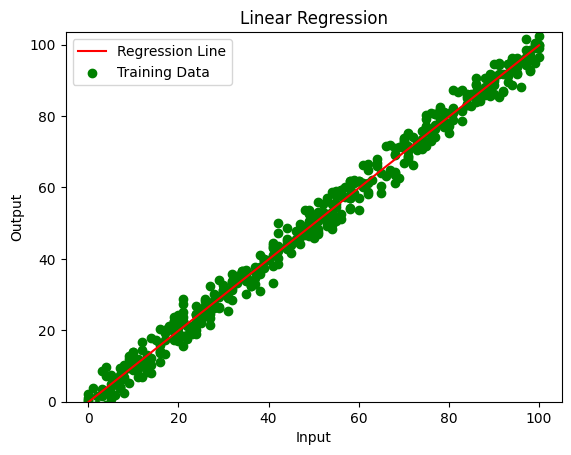

In [ ]:
#Example usage
linear_reg = LinearRegression()
parameters, loss = linear_reg.train(train_input, train_output, 0.0001, 20)


Model Coefficients: [0.04026032 3.31385993 0.12078097]
Intercept: -3.1599509492879228
Mean Squared Error: 5.362912814290877
R-squared Score: 0.9935326149415827


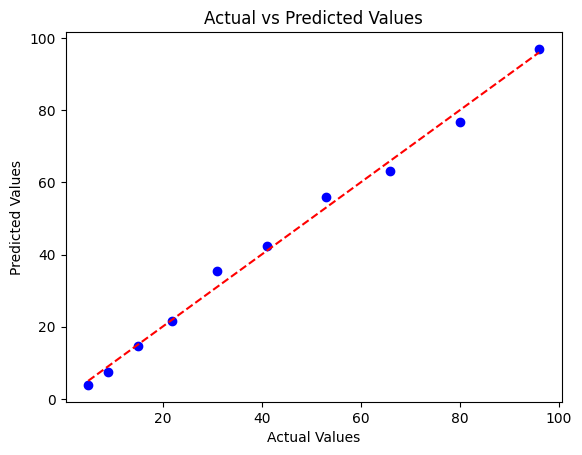

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Sample dataset
data = {
    "Feature1": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "Feature2": [2, 3, 5, 7, 11, 13, 17, 19, 23, 29],
    "Feature3": [3, 6, 9, 12, 15, 18, 21, 24, 27, 30],
    "Target": [5, 9, 15, 22, 31, 41, 53, 66, 80, 96]
}

df = pd.DataFrame(data)

# Split dataset into features (X) and target variable (y)
X = df.drop(columns=["Target"]).values
y = df["Target"].values.reshape(-1, 1)

# Add intercept column (bias term)
X = np.hstack((np.ones((X.shape[0], 1)), X))

# Compute the coefficients using the Normal Equation
beta = np.linalg.solve(X.T @ X + 0.01 * np.identity(X.shape[1]), X.T @ y)

# Make predictions
y_pred = X @ beta

# Evaluate the model
mse = np.mean((y - y_pred) ** 2)
total_variance = np.sum((y - np.mean(y)) ** 2)
explained_variance = np.sum((y_pred - np.mean(y)) ** 2)
r2 = explained_variance / total_variance

# Display results
print("Model Coefficients:", beta[1:].flatten())
print("Intercept:", beta[0][0])
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

# Plot actual vs predicted values
plt.scatter(y, y_pred, color='blue')
plt.plot(y, y, color='red', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()


Accuracy: 0.97


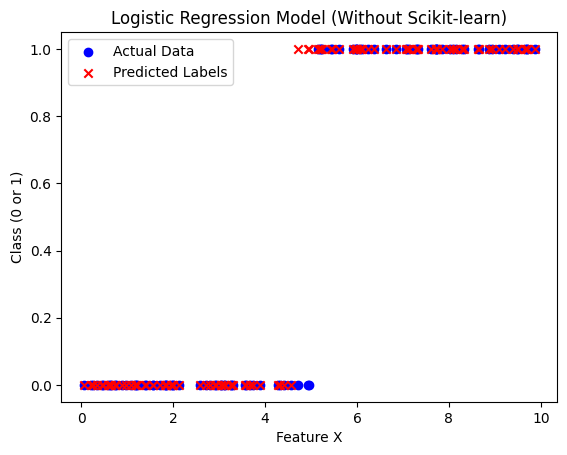

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_cost(X, y, theta):
    m = len(y)
    h = sigmoid(X @ theta)
    cost = (-1/m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    return cost

def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    cost_history = []

    for _ in range(iterations):
        gradient = (1/m) * X.T @ (sigmoid(X @ theta) - y)
        theta -= alpha * gradient
        cost_history.append(compute_cost(X, y, theta))

    return theta, cost_history

def predict(X, theta):
    return (sigmoid(X @ theta) >= 0.5).astype(int)

# Generate synthetic binary classification data
np.random.seed(42)
X = np.random.rand(100, 1) * 10  # Feature values between 0 and 10
y = (X > 5).astype(int).ravel()  # Label: 1 if X > 5, else 0

# Add intercept term
X_b = np.c_[np.ones((X.shape[0], 1)), X]

# Initialize parameters
theta = np.zeros(X_b.shape[1])
alpha = 0.1
iterations = 1000

# Train logistic regression using gradient descent
theta, cost_history = gradient_descent(X_b, y, theta, alpha, iterations)

# Make predictions
y_pred = predict(X_b, theta)

# Compute accuracy
accuracy = np.mean(y_pred == y)
print(f"Accuracy: {accuracy:.2f}")

# Plot the decision boundary
plt.scatter(X, y, color='blue', label='Actual Data')
plt.scatter(X, y_pred, color='red', marker='x', label='Predicted Labels')
plt.xlabel("Feature X")
plt.ylabel("Class (0 or 1)")
plt.legend()
plt.title("Logistic Regression Model (Without Scikit-learn)")
plt.show()